## Imports

In [1]:
# tabulate can be used to format output
import sys
!conda install --yes --prefix {sys.prefix} tabulate


DirectoryNotACondaEnvironmentError: The target directory exists, but it is not a conda environment.
Use 'conda create' to convert the directory to a conda environment.
  target directory: c:\Users\musti\OneDrive




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as lng
import scipy.io as io
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV

## Load dataset

In [4]:
data = io.loadmat('../Data/zipdata.mat')

X = data['X']
y = data['y'].ravel()
N, P = X.shape

###  4: Load the zip data and make a classification using random forests. As a minimum you need to tune the parameters: The number of trees, the number of variables to sample, and the tree size. Make an effort of explaining what happens when you tune each of the parameters. Which one is more important? Additionally answer:

In [27]:
# Make a randomforrest classifier. Try to experiment with criterion, number of estimators, max_depth, min_samples_leaf
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_leaf=1)

# use GridSearchCV to find the best model
# Define parameters to change and the values to try
# I suggest using a very small grid as it takes a long time to run otherwise
# Try implementing a small grid and then use the attached results for the discusion

params = {
    'n_estimators': [600,800],
    'criterion': ['gini', 'entropy'],
    'max_depth': [40, 50],
    'min_samples_leaf': [ 10, 50],
    'max_features': [50, 200,256]
}
rf_grid = GridSearchCV(clf, params, cv=5, n_jobs=-1)

# Fit the grid search model
rf_grid.fit(X, y)


#Save the results in a dataframe to disk
df = pd.DataFrame(rf_grid.cv_results_)
df.to_csv('CrossValidationResultsRandomForest.csv')

print(rf_grid.best_estimator_)

RandomForestClassifier(max_depth=40, max_features=50, min_samples_leaf=10,
                       n_estimators=600)


In [28]:
#If you just wanna read the saved results. 
#df = pd.read_csv('CrossValidationTAResultsRandomForest.csv')

df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.642511,0.078156,0.050099,0.007292,gini,40,50,10,600,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.7750,0.8250,0.8125,0.8625,0.8000,0.8150,0.028940,1
1,3.466074,0.074442,0.072707,0.007129,gini,40,50,10,800,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.7750,0.8125,0.8250,0.8625,0.8000,0.8150,0.028940,4
2,1.656669,0.058970,0.051602,0.005744,gini,40,50,50,600,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.4500,0.5500,0.5250,0.5125,0.4750,0.5025,0.035707,27
3,2.183832,0.084664,0.067245,0.003945,gini,40,50,50,800,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.4500,0.5625,0.5125,0.5375,0.4875,0.5100,0.039051,26
4,7.759114,0.548638,0.053080,0.005498,gini,40,200,10,600,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.7625,0.8000,0.8250,0.8250,0.7375,0.7900,0.034821,10
5,10.436897,0.526229,0.068604,0.002627,gini,40,200,10,800,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.7375,0.8000,0.8125,0.8375,0.7500,0.7875,0.037914,11
6,3.280363,0.236417,0.053446,0.007448,gini,40,200,50,600,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.4375,0.4750,0.4750,0.5125,0.3625,0.4525,0.050867,40
7,4.617800,0.479135,0.087696,0.045201,gini,40,200,50,800,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.4375,0.4875,0.4625,0.5000,0.3750,0.4525,0.044300,38
8,9.338448,0.507916,0.051262,0.002407,gini,40,256,10,600,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.7375,0.8000,0.8125,0.8375,0.7250,0.7825,0.043732,14
9,12.101694,0.643930,0.071564,0.004397,gini,40,256,10,800,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.7375,0.8000,0.8250,0.8250,0.7375,0.7850,0.039843,12


Text(0, 0.5, 'Mean test accuracy')

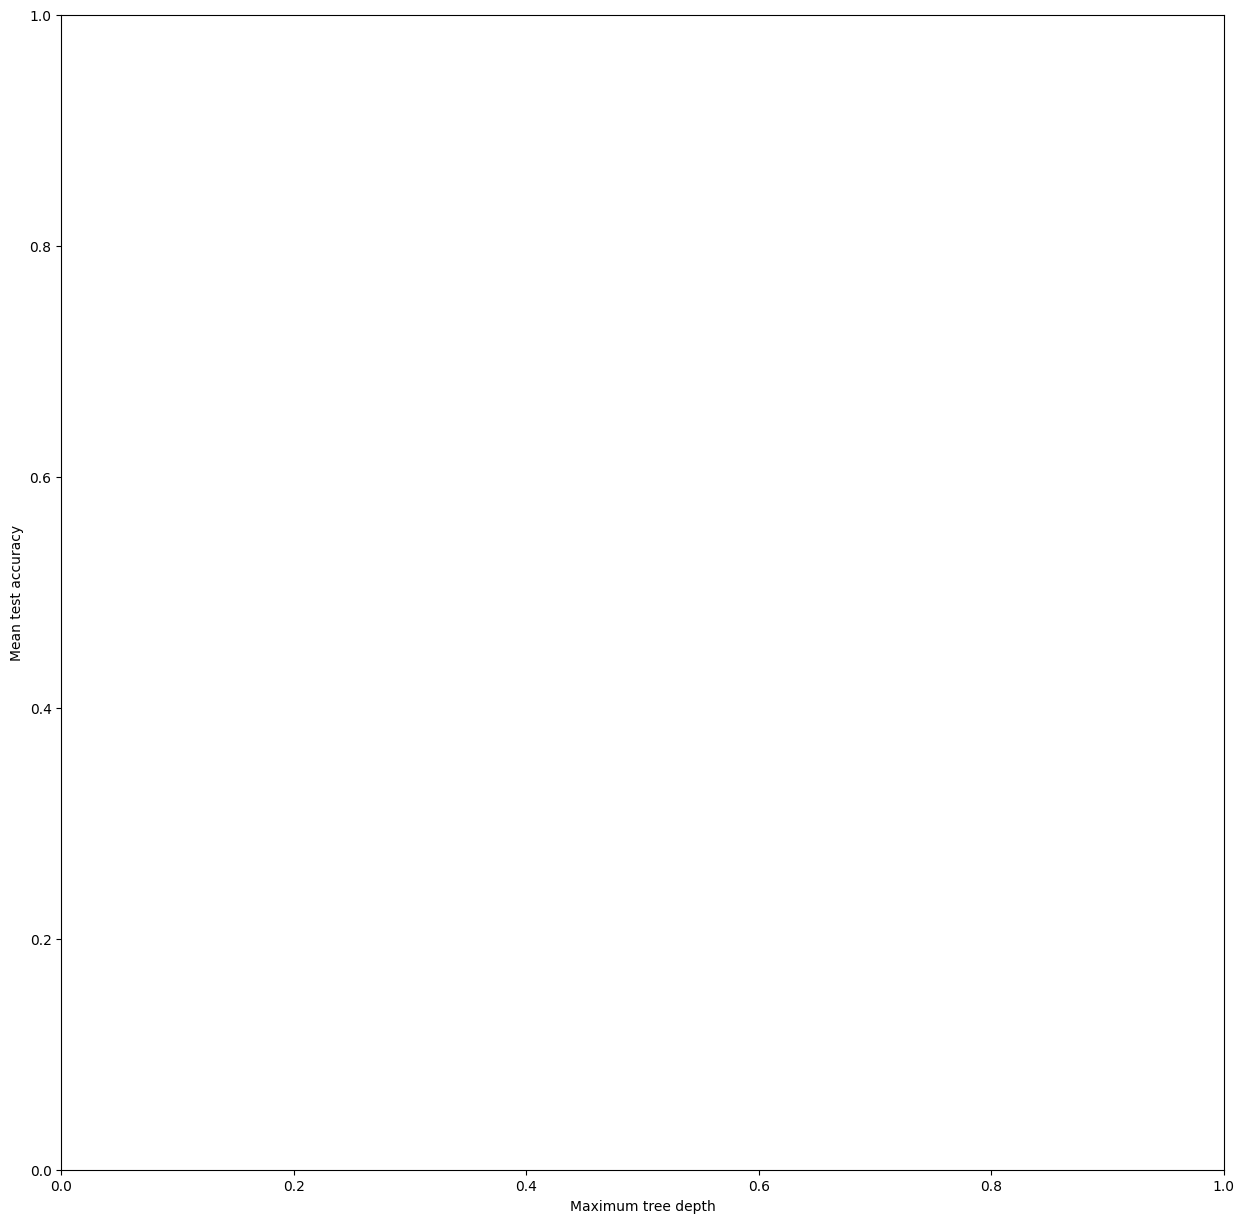

In [29]:
df_100_estimators = df[df['param_n_estimators']==100]

fig, ax = plt.subplots(figsize=(15,15))

_ = sns.lineplot(data=df_100_estimators, x='param_max_depth', y='mean_test_score', hue='param_n_estimators', ax=ax)
ax.set_xlabel('Maximum tree depth')
ax.set_ylabel('Mean test accuracy')

Text(0, 0.5, 'Mean test accuracy')

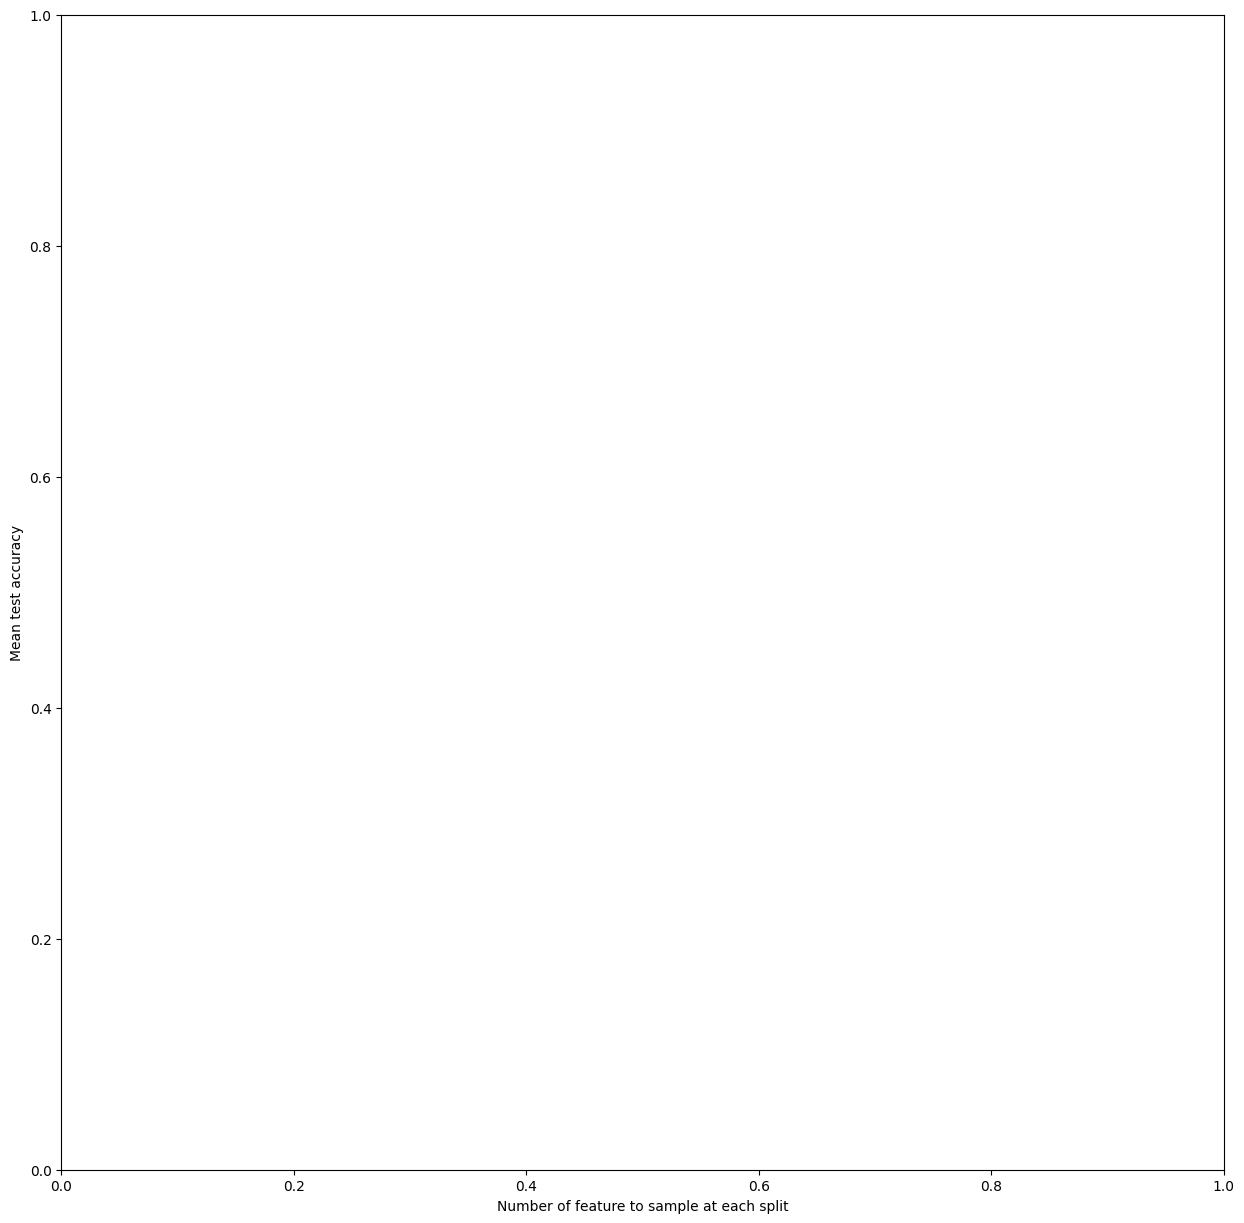

In [30]:
fig, ax = plt.subplots(figsize=(15,15))

_ = sns.lineplot(data=df_100_estimators, x='param_max_features', y='mean_test_score', hue='param_n_estimators', ax=ax)
ax.set_xlabel('Number of feature to sample at each split')
ax.set_ylabel('Mean test accuracy')

Text(0, 0.5, 'Mean test accuracy')

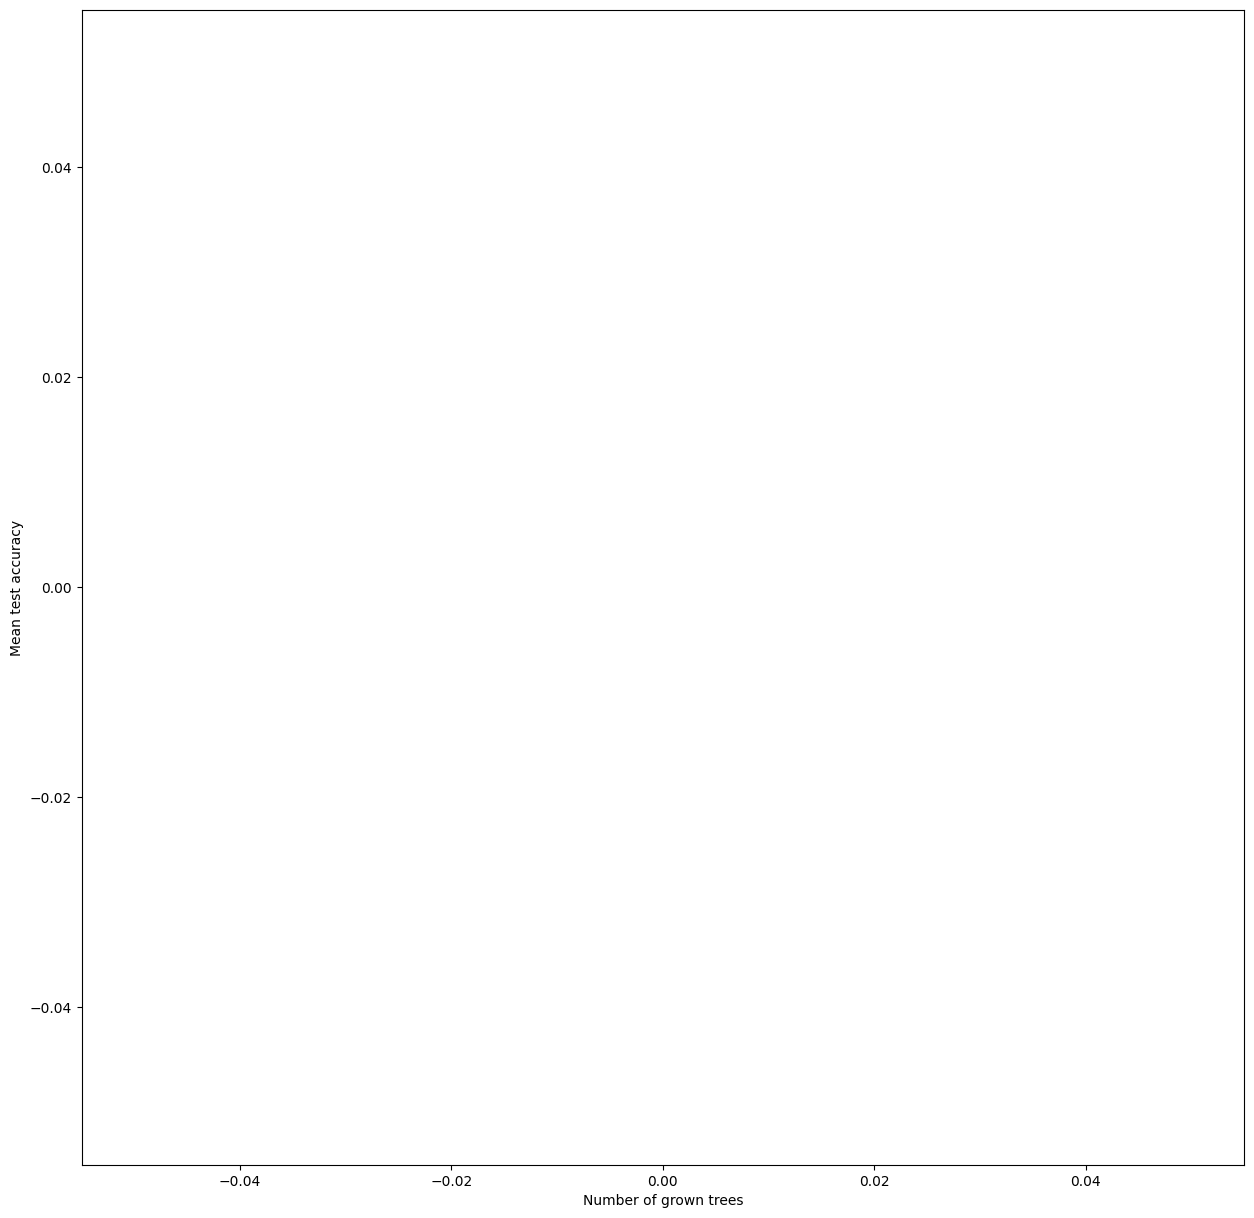

In [32]:
#We use the best to vizuallize the accuracy as a function of the grown trees
#What are they?
df_num_estimators = df[((df['param_max_features']==50) & (df['param_max_depth']==8))]

fig, ax = plt.subplots(figsize=(15,15))

_ = sns.lineplot(data=df_num_estimators, x='param_n_estimators', y='mean_test_score', ax=ax)
ax.set_xlabel('Number of grown trees')
ax.set_ylabel('Mean test accuracy')

> a) How should you set the parameters to run bagging?

To implement bagging (Bootstrap Aggregating) with the Random Forest classifier, you should set the parameters as follows:

max_features=n_features: Set this equal to the total number of features in your dataset. In bagging, all features are considered at each split, unlike standard random forests which use a subset of features.

bootstrap=True: This ensures each tree is trained on a bootstrap sample (random sampling with replacement) of the training data.

max_samples: You can set this to control the size of the bootstrap samples (typically around 0.6-1.0 of the original dataset size).

n_estimators: Use a sufficiently large number (e.g., 100 or more) to ensure stable predictions through averaging.

```from sklearn.ensemble import RandomForestClassifier

# Get number of features in the dataset
n_features = X_train.shape[1]

# Create a bagging model using RandomForestClassifier
bagging_model = RandomForestClassifier(
    n_estimators=100,
    max_features=n_features,  # Use all features (bagging)
    bootstrap=True,
    max_samples=0.8,  # Sample 80% of the data for each tree
    random_state=42
)

# Train the model
bagging_model.fit(X_train, y_train)```

> b) How should you set the parameters to run CART?

To run a standard CART (Classification and Regression Tree) model using scikit-learn's DecisionTreeClassifier, you should set the parameters as follows:

Use DecisionTreeClassifier directly: CART is a single decision tree algorithm, so you'll use the base tree classifier instead of an ensemble method like Random Forest.

Set parameters to control the tree complexity:

max_depth: Control the maximum depth of the tree (e.g., None for unlimited depth or a specific value like 5-10)
min_samples_split: Minimum number of samples required to split a node (e.g., 2)
min_samples_leaf: Minimum number of samples required in a leaf node (e.g., 1)
criterion: Use 'gini' for Gini impurity or 'entropy' for information gain


```
from sklearn.tree import DecisionTreeClassifier

# Create a standard CART model
cart_model = DecisionTreeClassifier(
    criterion='gini',  # Use Gini impurity (standard for CART)
    max_depth=None,    # No limit on depth (or specify a value)
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train the model
cart_model.fit(X_train, y_train)
```


> c) Plot variable importances and a variable correlation matrix. How do you interpret
these?

In [34]:
## Look at the best estimator and the importance of the features

score = rf_grid.best_estimator_.fit(X, y)
headers = ["name", "score"]
values = sorted(zip(range(0,P), rf_grid.best_estimator_.feature_importances_), key=lambda x: x[1] * -1)

# See which features are deemed most important by the classifier
# Only gonna look at the 10 most important features out of 256
print(tabulate(values[0:10], ["name", "score"][0:10], tablefmt="plain"))
print ('Random Forest OOB error rate: {}'.format(1 - rf_grid.best_estimator_.oob_score_))

  name      score
   212  0.027151
    37  0.0262197
   196  0.0261073
    88  0.0207903
   152  0.020743
   120  0.0190476
    72  0.0187974
    71  0.0185732
   135  0.0176666
   104  0.0172875


AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'